In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('insurance.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'Age vs Charges')

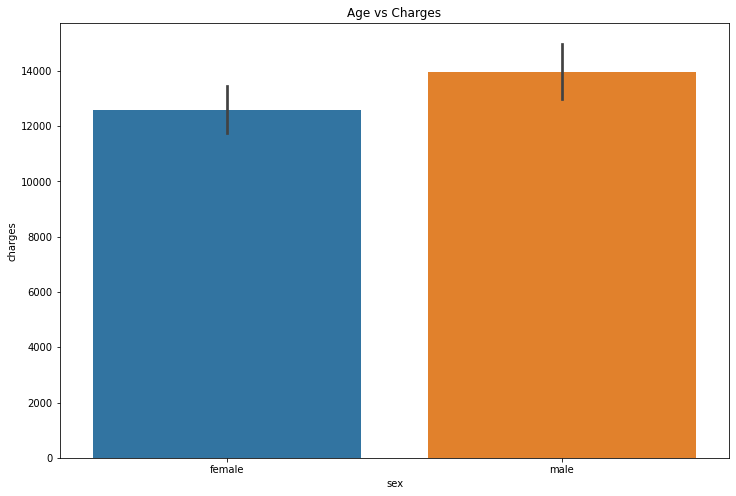

In [9]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'sex', y = 'charges', data = dataset)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

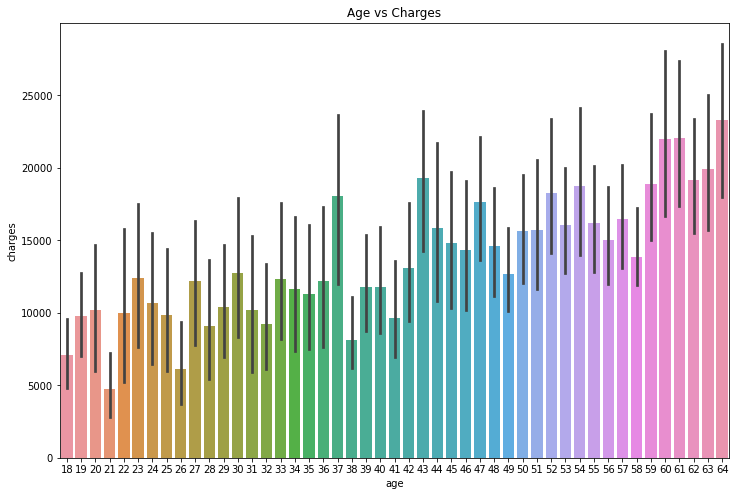

In [10]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = dataset)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

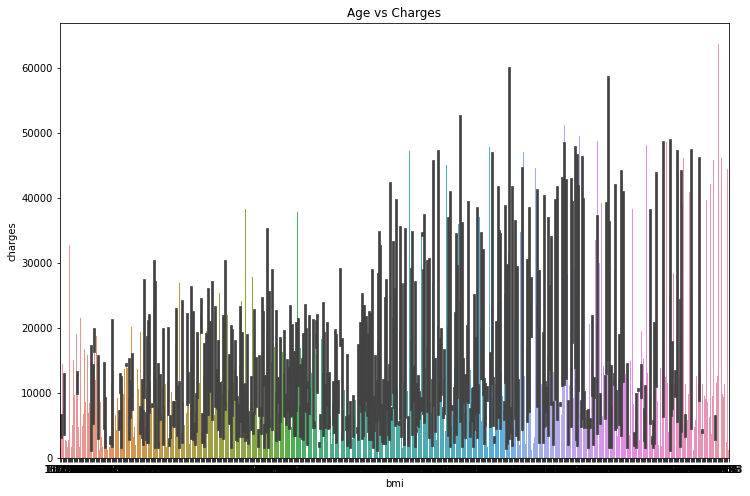

In [11]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'bmi', y = 'charges', data = dataset)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

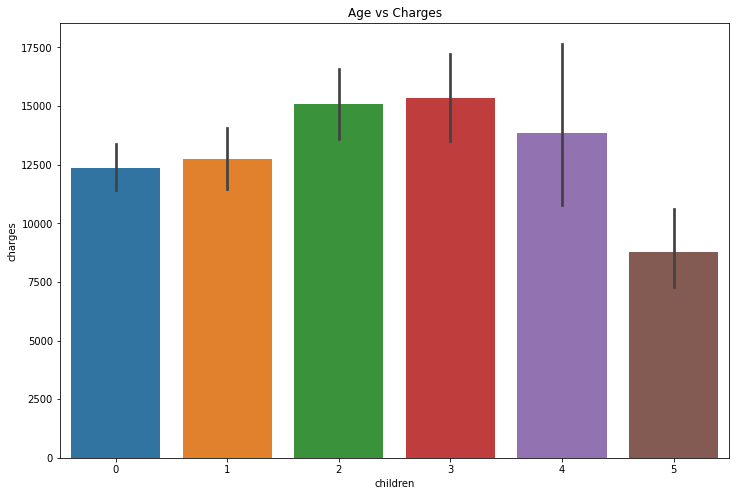

In [12]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = dataset)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

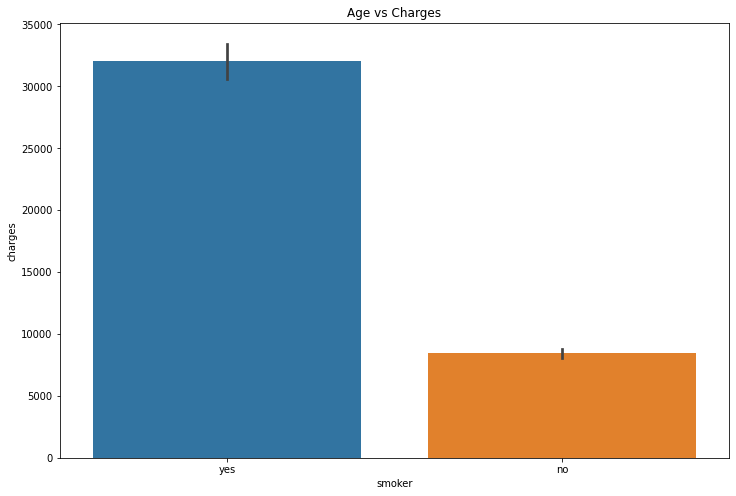

In [13]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'smoker', y = 'charges', data = dataset)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

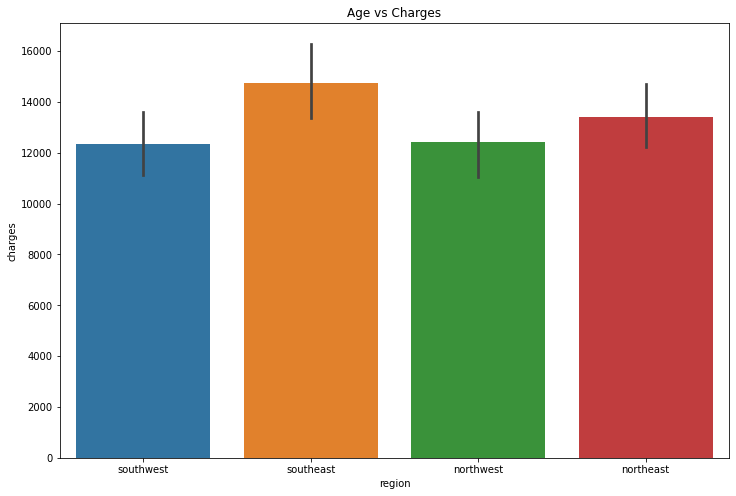

In [14]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = dataset)

plt.title("Age vs Charges")

In [15]:
dataset = dataset.drop('region', axis = 1)

In [16]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])

In [18]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [19]:
X = dataset.iloc[:,:5]
y = dataset.iloc[:,5]

print(X.shape)
print(y.shape)

(1338, 5)
(1338,)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [21]:
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [22]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# creating the Linear Regression model
lR = LinearRegression()

# # feeding the training data to the model
lR.fit(X_train, y_train)

y_pred_lR = lR.predict(X_test)

lR.score(X_train,y_train)

0.7463716002316689

In [23]:
from sklearn.svm import SVR

# creating the model
svr = SVR()

# feeding the training data to the model
svr.fit(X_train, y_train)

# predicting the test set results
y_pred_svr = svr.predict(X_test)
svr.score(X_train,y_train)

-0.09361994960428022

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)
regressor.score(X_train,y_train)

0.9640086046250348